In [1]:
### Load Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [3]:
### Prepare/collect data

In [4]:
import os

path = os.listdir('Datathon-Dataset/')
classes = {'no_tumor':0, 'category1_tumor':1, 'category2_tumor':2, 'category3_tumor':3}

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'Datathon-Dataset/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [7]:
np.unique(Y)

array([0, 1, 2, 3])

In [8]:
pd.Series(Y).value_counts()

2    927
1    916
3    891
0    490
Name: count, dtype: int64

In [9]:
X.shape, X_updated.shape

((3224, 200, 200), (3224, 40000))

In [10]:
### Visualize data

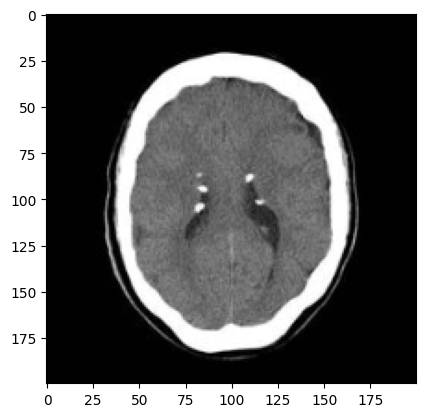

In [11]:
plt.imshow(X[2], cmap='gray')

In [12]:
### Prepare data

In [13]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3224, 40000)

In [14]:
### Split Data

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [16]:
xtrain.shape, xtest.shape

((2579, 40000), (645, 40000))

In [17]:
### Feature Scaling

In [18]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [19]:
### Feature Selection: PCA -NOT ADDED---

In [20]:
from sklearn.decomposition import PCA

In [21]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2579, 40000) (645, 40000)


In [22]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

In [23]:
### Train Model -logistic regression and support vectoric machines

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [25]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [26]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [27]:
### Evaluation

In [28]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.9976735168670027
Testing Score: 0.7891472868217054


In [29]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9375727025979061
Testing Score: 0.8186046511627907


In [30]:
### Prediction

In [31]:
pred = sv.predict(xtest)


In [32]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  2,   4,   6,   8,  22,  32,  33,  37,  40,  42,  45,  46,  47,
         48,  49,  51,  56,  58,  69,  79,  80,  87,  90,  96, 119, 132,
        136, 141, 147, 150, 156, 158, 163, 164, 167, 175, 179, 189, 203,
        204, 205, 210, 215, 219, 228, 244, 258, 262, 264, 275, 281, 291,
        299, 319, 330, 332, 333, 337, 338, 343, 349, 352, 354, 355, 358,
        367, 374, 375, 381, 384, 392, 398, 400, 401, 407, 418, 419, 422,
        426, 428, 430, 431, 433, 440, 448, 450, 458, 476, 477, 484, 485,
        490, 496, 498, 502, 504, 508, 509, 512, 517, 528, 529, 530, 533,
        539, 545, 557, 565, 573, 581, 587, 600, 608, 612, 637, 639, 643],
       dtype=int64),)

In [33]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  117
3 3


In [34]:
### TEST MODEL

In [35]:
dec = {0:'No Tumor', 1:'Category 1 Tumor',2:'Category 2 Tumor',3:'Category 3 Tumor'}

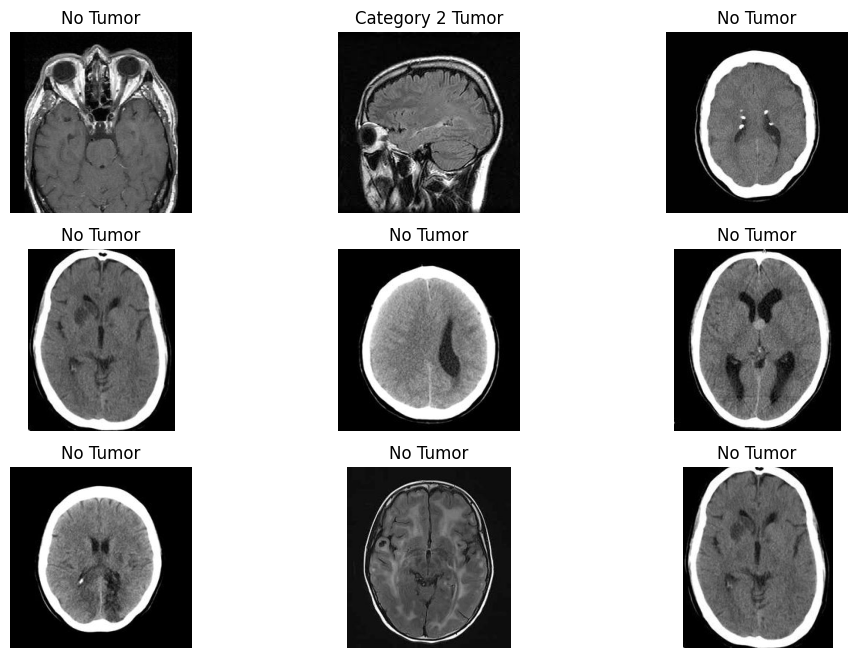

In [40]:
plt.figure(figsize=(12,8))
p = os.listdir('Datathon-Dataset/')
c=1
for i in os.listdir('Datathon-Dataset/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('Datathon-Dataset/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

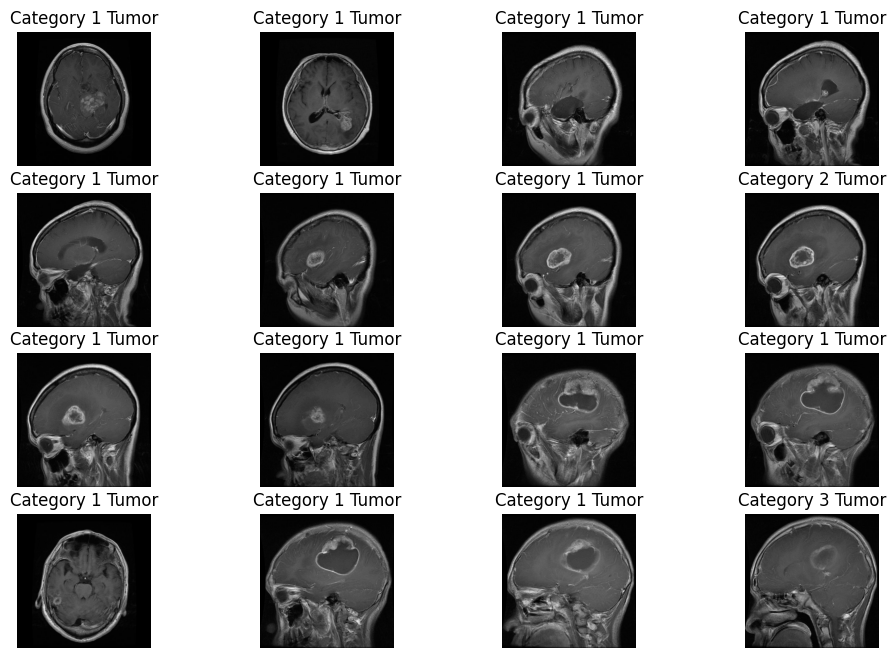

In [41]:
plt.figure(figsize=(12,8))
p = os.listdir('Datathon-Dataset/')
c=1
for i in os.listdir('Datathon-Dataset/category1_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('Datathon-Dataset/category1_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

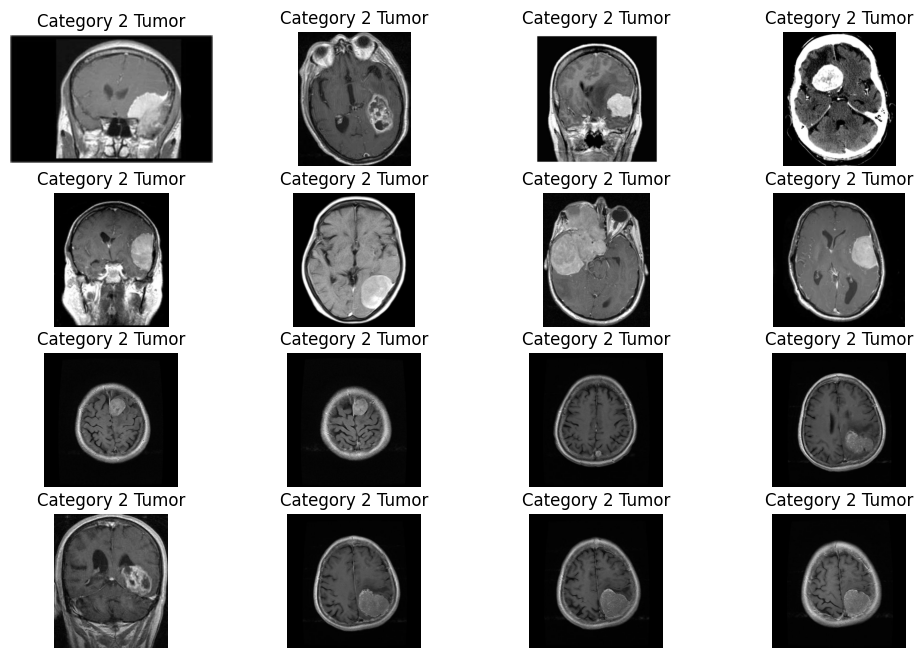

In [38]:
plt.figure(figsize=(12,8))
p = os.listdir('Datathon-Dataset/')
c=1
for i in os.listdir('Datathon-Dataset/category2_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('Datathon-Dataset/category2_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

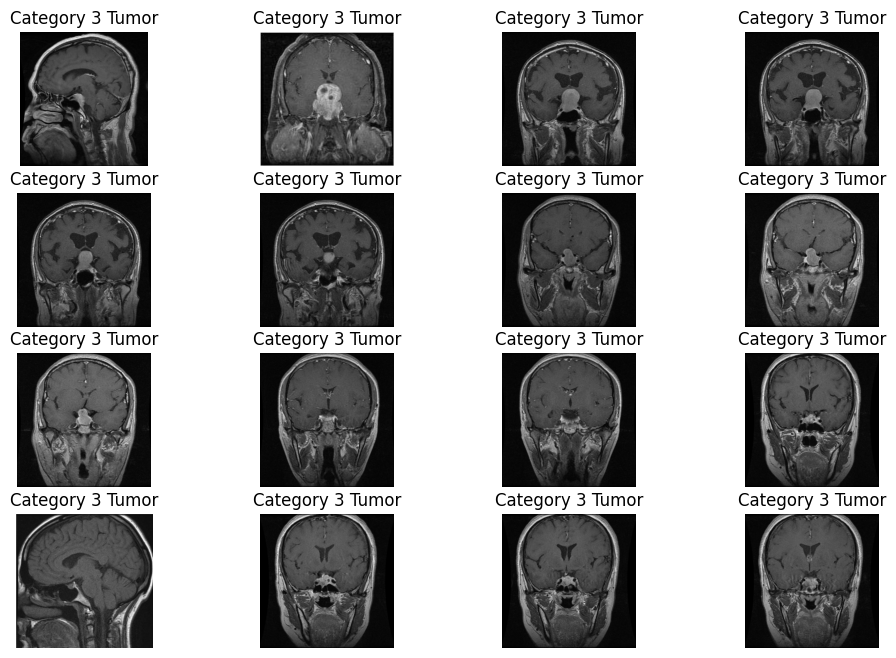

In [39]:
plt.figure(figsize=(12,8))
p = os.listdir('Datathon-Dataset/')
c=1
for i in os.listdir('Datathon-Dataset/category3_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('Datathon-Dataset/category3_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1